In [342]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
sns.set(style='darkgrid')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/cat-in-the-dat/test.csv
/kaggle/input/cat-in-the-dat/train.csv
/kaggle/input/cat-in-the-dat/sample_submission.csv


In [343]:
train_data = pd.read_csv("/kaggle/input/cat-in-the-dat/train.csv")
test_data = pd.read_csv("/kaggle/input/cat-in-the-dat/test.csv")
subm_data = pd.read_csv("/kaggle/input/cat-in-the-dat/sample_submission.csv")
train_data.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [344]:
train_data.shape

(300000, 25)

In [345]:
#To CHeck 
train_data.isnull().sum().sum()

0

In [346]:
test_data.isnull().sum().sum()

0

In [347]:
#Id column is not necessary 
train_data=train_data.drop(['id'], axis = 1)
test_data=test_data.drop(['id'], axis = 1)

In [348]:
All_features=train_data.columns.tolist()
Numerical_features=['bin_0','bin_1','bin_2','ord_0','day','month','target']
categorical_features=list(set(All_features) - set(Numerical_features))
Numerical_features.remove('target')
print(categorical_features)
print(Numerical_features)

['nom_5', 'nom_6', 'ord_4', 'nom_9', 'nom_8', 'bin_3', 'ord_5', 'bin_4', 'nom_7', 'ord_2', 'nom_0', 'nom_4', 'ord_3', 'nom_2', 'nom_1', 'ord_1', 'nom_3']
['bin_0', 'bin_1', 'bin_2', 'ord_0', 'day', 'month']


<hr>
<h3>Working on Numerical Data</h3>

In [349]:
# to get description of numerical data in dataset
train_data.describe()

,bin_0,bin_1,bin_2,ord_0,day,month,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.00000
mean,0.127503,0.256607,0.383223,1.479567,3.007817,5.771113,0.30588
std,0.333537,0.436761,0.486173,0.712524,1.817949,3.843519,0.46078
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.00000
25%,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,0.00000
50%,0.000000,0.000000,0.000000,1.000000,3.000000,4.000000,0.00000
75%,0.000000,1.000000,1.000000,2.000000,4.000000,9.000000,1.00000
max,1.000000,1.000000,1.000000,3.000000,7.000000,12.000000,1.00000


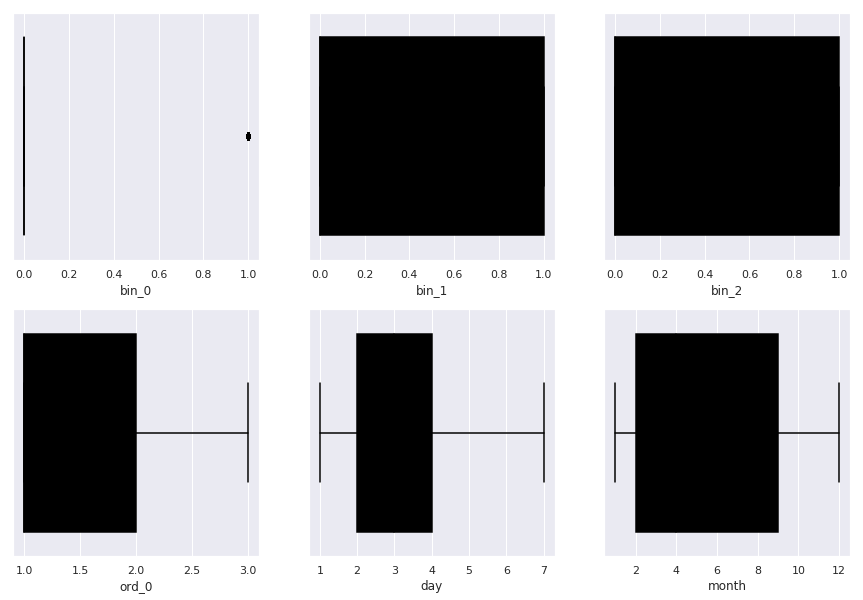

In [350]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for variable, subplot in zip(Numerical_features, ax.flatten()):
    sns.boxplot(train_data[variable], ax=subplot, color='black')
    for label in subplot.get_xticklabels():
        label.set_rotation(0)

No Need of outlier Treatment

<hr>
<h3>Working on Categorical Data</h3>

In [351]:
for cname in categorical_features:
    print(cname+" : "+str(len(train_data[cname].unique())))

nom_5 : 222
nom_6 : 522
ord_4 : 26
nom_9 : 11981
nom_8 : 2215
bin_3 : 2
ord_5 : 192
bin_4 : 2
nom_7 : 1220
ord_2 : 6
nom_0 : 3
nom_4 : 4
ord_3 : 15
nom_2 : 6
nom_1 : 6
ord_1 : 5
nom_3 : 6


In [352]:
train_data.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


we can divide the categorical variables available into 3 sub categories
1. Binary Categorical variables - Converting them into 1's and 0's
2. Ordinal Variables - Converting them into numerical data starting from 1 to N
3. Nominal Variables - One hot encoding
4. day and month 

In [353]:
binary = {'T': 1,'F': 0}
train_data["bin_3"]= [binary[item] for item in train_data["bin_3"]]
test_data["bin_3"]= [binary[item] for item in test_data["bin_3"]]
binary = {'Y': 1,'N': 0}
train_data["bin_4"]= [binary[item] for item in train_data["bin_4"]]
test_data["bin_4"]= [binary[item] for item in test_data["bin_4"]]
train_data.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,1,1,Green,Triangle,Snake,Finland,Bassoon,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,0,1,0,1,1,Green,Trapezoid,Hamster,Russia,Piano,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,0,0,0,0,1,Blue,Trapezoid,Lion,Russia,Theremin,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,0,1,0,0,1,Red,Trapezoid,Snake,Canada,Oboe,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,0,0,0,0,0,Red,Trapezoid,Lion,Canada,Oboe,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [354]:
nominal_col = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4']
ordinal_col = ['ord_0', 'ord_1', 'ord_2', 'ord_3']

In [355]:
# keeping the ord_5 features aside as it has higher amount of cardinality
# Importing categorical options of pandas
from pandas.api.types import CategoricalDtype 

# seting the orders of our ordinal features
ord_1 = CategoricalDtype(categories=['Novice', 'Contributor','Expert', 
                                     'Master', 'Grandmaster'], ordered=True)
ord_2 = CategoricalDtype(categories=['Freezing', 'Cold', 'Warm', 'Hot',
                                     'Boiling Hot', 'Lava Hot'], ordered=True)
ord_3 = CategoricalDtype(categories=['a', 'b', 'c', 'd', 'e', 'f', 'g',
                                     'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o'], ordered=True)
ord_4 = CategoricalDtype(categories=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I',
                                     'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R',
                                     'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'], ordered=True)

In [356]:
# Transforming ordinal Features
train_data.ord_1 = train_data.ord_1.astype(ord_1)
train_data.ord_2 = train_data.ord_2.astype(ord_2)
train_data.ord_3 = train_data.ord_3.astype(ord_3)
train_data.ord_4 = train_data.ord_4.astype(ord_4)
train_data.ord_1 = train_data.ord_1.cat.codes
train_data.ord_2 = train_data.ord_2.cat.codes
train_data.ord_3 = train_data.ord_3.cat.codes
train_data.ord_4 = train_data.ord_4.cat.codes
train_data.head()

test_data.ord_1 = test_data.ord_1.astype(ord_1)
test_data.ord_2 = test_data.ord_2.astype(ord_2)
test_data.ord_3 = test_data.ord_3.astype(ord_3)
test_data.ord_4 = test_data.ord_4.astype(ord_4)
test_data.ord_1 = test_data.ord_1.cat.codes
test_data.ord_2 = test_data.ord_2.cat.codes
test_data.ord_3 = test_data.ord_3.cat.codes
test_data.ord_4 = test_data.ord_4.cat.codes

In [357]:
print(str(train_data.day.unique())+" "+str(train_data.month.unique()))

[2 7 5 4 3 1 6] [ 2  8  1  4 10  3  7  9 12 11  5  6]


In [358]:
train_data['ord_5_ot'] = 'Others'
train_data.loc[train_data['ord_5'].isin(train_data['ord_5'].value_counts()[:25].sort_index().index), 'ord_5_ot'] = train_data['ord_5']

test_data['ord_5_ot'] = 'Others'
test_data.loc[test_data['ord_5'].isin(test_data['ord_5'].value_counts()[:25].sort_index().index), 'ord_5_ot'] = test_data['ord_5']

In [359]:
train_data.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target,ord_5_ot
0,0,0,0,1,1,Green,Triangle,Snake,Finland,Bassoon,...,2,4,1,7,3,kr,2,2,0,Others
1,0,1,0,1,1,Green,Trapezoid,Hamster,Russia,Piano,...,1,4,3,0,0,bF,7,8,0,bF
2,0,0,0,0,1,Blue,Trapezoid,Lion,Russia,Theremin,...,1,2,5,7,17,Jc,7,2,0,Jc
3,0,1,0,0,1,Red,Trapezoid,Snake,Canada,Oboe,...,1,4,4,8,3,kW,2,1,1,kW
4,0,0,0,0,0,Red,Trapezoid,Lion,Canada,Oboe,...,1,4,0,0,17,qP,7,8,0,qP


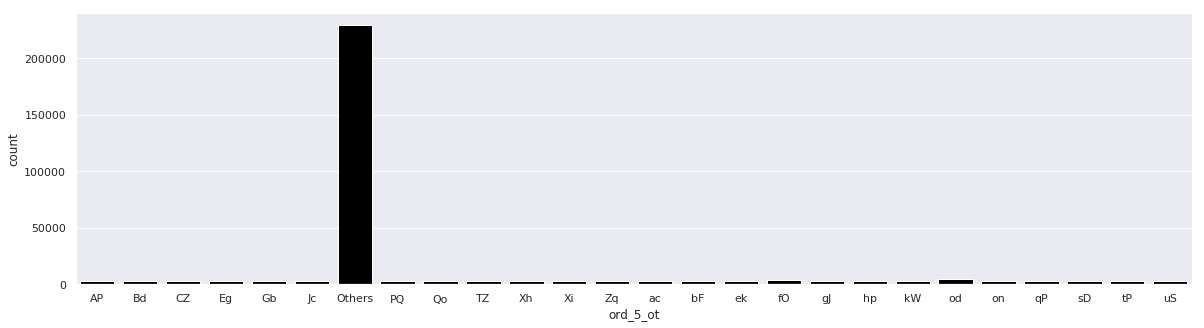

In [360]:
plt.figure(figsize=(20,5))
sns.countplot(x='ord_5_ot', data=train_data,
                   order=list(train_data['ord_5_ot'].value_counts().sort_index().index) ,
                   color='black') 

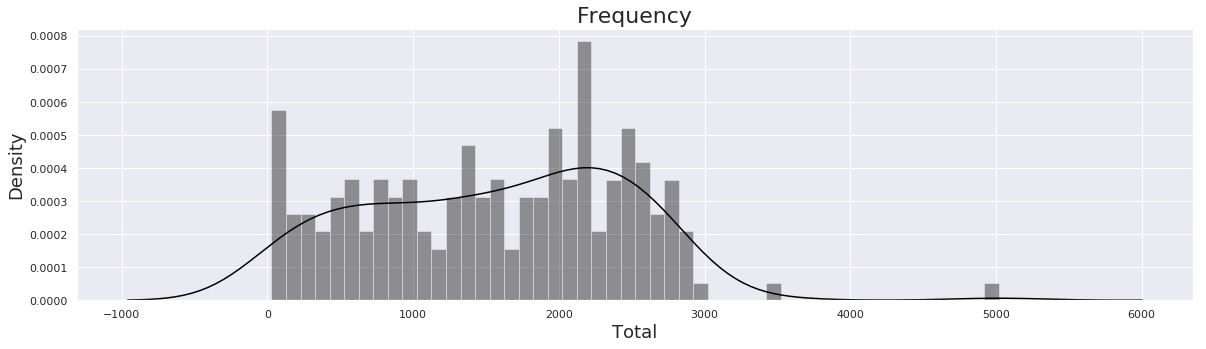

In [361]:
ord_5_count = train_data['ord_5'].value_counts().reset_index()['ord_5'].values
plt.figure(figsize=(20,5))
g = sns.distplot(ord_5_count, bins= 50,color='black')
g.set_title("Frequency", fontsize=22)
g.set_xlabel("Total", fontsize=18)
g.set_ylabel("Density", fontsize=18)
plt.show()

In [362]:
### Credit of this features to: 
## https://www.kaggle.com/gogo827jz/catboost-baseline-with-feature-importance
import string
# Then encode 'ord_5' using ACSII values
# Add up the indices of two letters in string.ascii_letters
train_data['ord_5_new'] = train_data['ord_5_ot'].apply(lambda x:sum([(string.ascii_letters.find(letter)+1) for letter in x]))
test_data['ord_5_new'] = test_data['ord_5_ot'].apply(lambda x:sum([(string.ascii_letters.find(letter)+1) for letter in x]))
#train_data['ord_5_new']= train_data['ord_5_new'].astype('float64')
                                                    

In [363]:
train_data=train_data.drop(['ord_5_ot','ord_5'], axis = 1) 
test_data=test_data.drop(['ord_5_ot','ord_5'], axis = 1) 
train_data.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,day,month,target,ord_5_new
0,0,0,0,1,1,Green,Triangle,Snake,Finland,Bassoon,...,2f4cb3d51,2,4,1,7,3,2,2,0,111
1,0,1,0,1,1,Green,Trapezoid,Hamster,Russia,Piano,...,f83c56c21,1,4,3,0,0,7,8,0,34
2,0,0,0,0,1,Blue,Trapezoid,Lion,Russia,Theremin,...,ae6800dd0,1,2,5,7,17,7,2,0,39
3,0,1,0,0,1,Red,Trapezoid,Snake,Canada,Oboe,...,8270f0d71,1,4,4,8,3,2,1,1,60
4,0,0,0,0,0,Red,Trapezoid,Lion,Canada,Oboe,...,b164b72a7,1,4,0,0,17,7,8,0,59


<h3> We have successfully converted all the ordinal data into numerical data</h3>

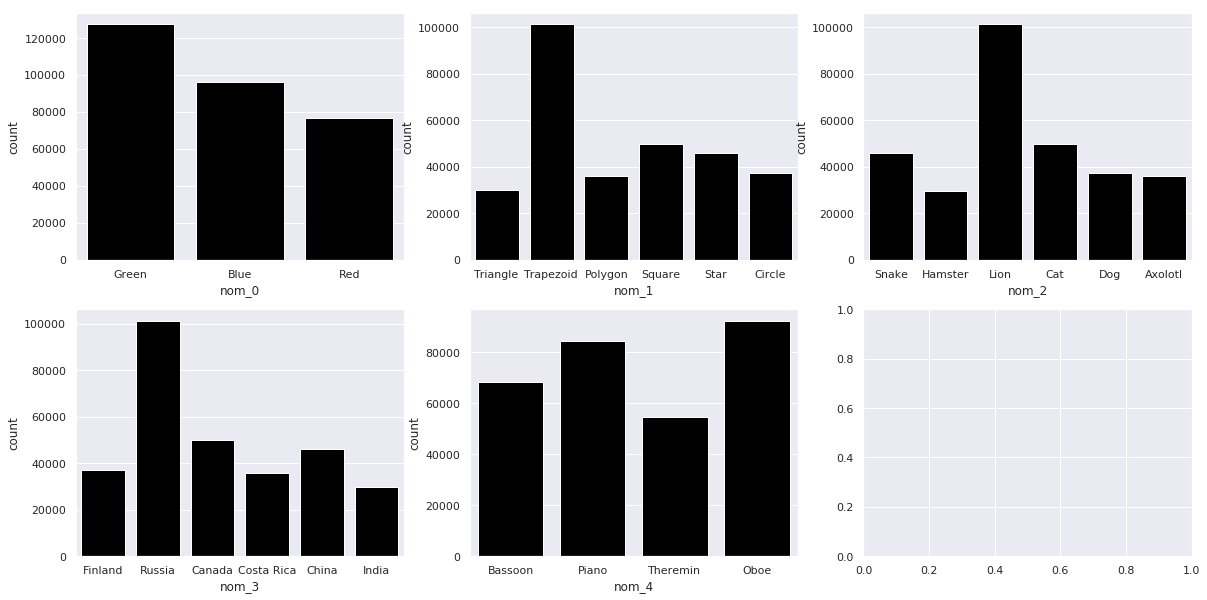

In [364]:
nominal_col = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4']
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for variable, subplot in zip(nominal_col, ax.flatten()):
    sns.countplot(train_data[variable], ax=subplot, color='black')
    for label in subplot.get_xticklabels():
        label.set_rotation(0)

In [365]:
high_card_feats = ['nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9']
for x in high_card_feats:
    print(x+"-"+str(len(train_data[x].unique())))

nom_5-222
nom_6-522
nom_7-1220
nom_8-2215
nom_9-11981


In [366]:
for col in high_card_feats:
    train_data[f'hash_{col}'] = train_data[col].apply( lambda x: hash(str(x)) % 5000 )
    test_data[f'hash_{col}'] = test_data[col].apply( lambda x: hash(str(x)) % 5000 )

In [367]:
for col in high_card_feats:
    enc_nom_1 = (train_data.groupby(col).size()) / len(train_data)
    train_data[f'freq_{col}'] = train_data[col].apply(lambda x : enc_nom_1[x])
    #df_test[f'enc_{col}'] = df_test[col].apply(lambda x : enc_nom_1[x])

Label ENcoding

In [368]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
for f in ['nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9']:
    if train_data[f].dtype=='object' or test_data[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train_data[f].values) + list(test_data[f].values))
        train_data[f'le_{f}'] = lbl.transform(list(train_data[f].values))
        test_data[f'le_{f}'] = lbl.transform(list(test_data[f].values))   

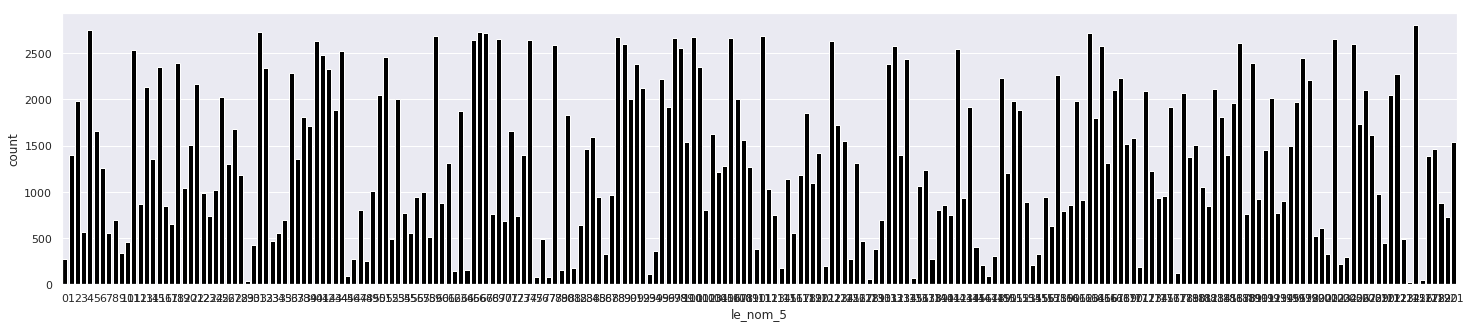

In [369]:
plt.figure(figsize=(25,5))
sns.countplot(x='le_nom_5', data=train_data,
                   order=list(train_data['le_nom_5'].value_counts().sort_index().index) ,
                   color='black') 

In [370]:
train_data.columns

Index(['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1', 'nom_2',
       'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9', 'ord_0',
       'ord_1', 'ord_2', 'ord_3', 'ord_4', 'day', 'month', 'target',
       'ord_5_new', 'hash_nom_5', 'hash_nom_6', 'hash_nom_7', 'hash_nom_8',
       'hash_nom_9', 'freq_nom_5', 'freq_nom_6', 'freq_nom_7', 'freq_nom_8',
       'freq_nom_9', 'le_nom_5', 'le_nom_6', 'le_nom_7', 'le_nom_8',
       'le_nom_9'],
      dtype='object')

In [371]:
test_data.columns

Index(['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1', 'nom_2',
       'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9', 'ord_0',
       'ord_1', 'ord_2', 'ord_3', 'ord_4', 'day', 'month', 'ord_5_new',
       'hash_nom_5', 'hash_nom_6', 'hash_nom_7', 'hash_nom_8', 'hash_nom_9',
       'le_nom_5', 'le_nom_6', 'le_nom_7', 'le_nom_8', 'le_nom_9'],
      dtype='object')

In [372]:
train_data.drop([ 'hash_nom_5','hash_nom_6', 'hash_nom_7', 'hash_nom_8', 'hash_nom_9','freq_nom_5','freq_nom_6', 'freq_nom_7', 'freq_nom_8', 'freq_nom_9',
                'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9'], axis=1, inplace=True)

test_data.drop([ 'hash_nom_5','hash_nom_6', 'hash_nom_7', 'hash_nom_8', 'hash_nom_9','nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9'], axis=1, inplace=True)

In [373]:
train_data.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,ord_4,day,month,target,ord_5_new,le_nom_5,le_nom_6,le_nom_7,le_nom_8,le_nom_9
0,0,0,0,1,1,Green,Triangle,Snake,Finland,Bassoon,...,3,2,2,0,111,78,120,491,1689,2192
1,0,1,0,1,1,Green,Trapezoid,Hamster,Russia,Piano,...,0,7,8,0,34,159,510,260,652,11719
2,0,0,0,0,1,Blue,Trapezoid,Lion,Russia,Theremin,...,17,7,2,0,39,44,14,766,1935,8140
3,0,1,0,0,1,Red,Trapezoid,Snake,Canada,Oboe,...,3,2,1,1,60,209,165,1121,631,6098
4,0,0,0,0,0,Red,Trapezoid,Lion,Canada,Oboe,...,17,7,8,0,59,90,61,34,1763,8293


In [374]:
# credits to eda-feat-engineering-encode-conquer kernal
test_data['target'] = 'test'
df = pd.concat([train_data, test_data], axis=0, sort=False )

In [375]:
print(f'Shape before dummy transformation: {df.shape}')
df = pd.get_dummies(df, columns=['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4'],\
                          prefix=['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4'], drop_first=True)
print(f'Shape after dummy transformation: {df.shape}')

Shape before dummy transformation: (500000, 24)
Shape after dummy transformation: (500000, 39)


In [376]:
train_data, test_data = df[df['target'] != 'test'], df[df['target'] == 'test'].drop('target', axis=1)
del df

In [377]:
train_data.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,ord_0,ord_1,ord_2,ord_3,ord_4,...,nom_2_Lion,nom_2_Snake,nom_3_China,nom_3_Costa Rica,nom_3_Finland,nom_3_India,nom_3_Russia,nom_4_Oboe,nom_4_Piano,nom_4_Theremin
0,0,0,0,1,1,2,4,1,7,3,...,0,1,0,0,1,0,0,0,0,0
1,0,1,0,1,1,1,4,3,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,0,0,1,1,2,5,7,17,...,1,0,0,0,0,0,1,0,0,1
3,0,1,0,0,1,1,4,4,8,3,...,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,4,0,0,17,...,1,0,0,0,0,0,0,1,0,0


All the features are now handled

In [385]:
x = train_data.drop(["target"], axis=1)
y = train_data["target"]
y = y.astype(bool)
test_X = test_data.drop([],axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [380]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

**KNN classification alogrithm**

In [387]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Accuracy:"+str(accuracy_score(y_test, y_pred)*100))

Accuracy:62.93


In [388]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.70      0.83      0.76     62496
        True       0.31      0.18      0.22     27504

    accuracy                           0.63     90000
   macro avg       0.50      0.50      0.49     90000
weighted avg       0.58      0.63      0.59     90000



In [390]:
from sklearn import metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred))
print("precision", metrics.precision_score(y_test,y_pred))
print("recall", metrics.recall_score(y_test,y_pred))
confusion=confusion_matrix(y_test,y_pred)    
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print("Sensitivity",TP / float(TP+FN))
# positive predictive value 
print ("Positive Predection Rate",TP / float(TP+FP))
# Negative predictive value
print ("Negative Predection rate",TN / float(TN+ FN))
# Calculate false postive rate - predicting churn when customer does not have churned
print("False positive Predection Rate",FP/ float(TN+FP))

accuracy 0.6293
precision 0.3110609480812641
recall 0.1753563118091914
Sensitivity 0.1753563118091914
Positive Predection Rate 0.3110609480812641
Negative Predection rate 0.6955366131955165
False positive Predection Rate 0.17092293906810035


In [ ]:
y_pred = knn.predict(test_X)

In [384]:
subm_data['target'] = y_pred
subm_data.to_csv('finalsubmission.csv')